<b>This dataset has funding information of the Indian startups from January 2015 to August 2017.</b>

<b>Feature Details :</b>
SNo - Serial number.

Date - Date of funding in format DD/MM/YYYY.

StartupName - Name of the startup which got funded.

IndustryVertical - Industry to which the startup belongs.

SubVertical - Sub-category of the industry type.

CityLocation - City which the startup is based out of.

InvestorsName - Name of the investors involved in the funding round.

InvestmentType - Either Private Equity or Seed Funding.

AmountInUSD - Funding AmountInUSD.

Remarks - Other information, if any.

# data cleaning and preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
from collections import OrderedDict


df = pd.read_csv("startup_funding.csv")
print(df.info())
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB
None


,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [3]:
df.rename(columns={
    'Sr No': 'SrNo',
    'Date dd/mm/yyyy': 'Date',
    'Startup Name': 'StartupName',
    'Industry Vertical': 'IndustryVertical',
    'SubVertical': 'SubVertical',
    'City  Location': 'CityLocation',
    'Investors Name': 'InvestorsName',
    'InvestmentnType': 'InvestmentType',
    'Amount in USD': 'AmountInUSD',
    'Remarks': 'Remarks'
}, inplace=True)

In [4]:
df.columns

Index(['SrNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical',
       'CityLocation', 'InvestorsName', 'InvestmentType', 'AmountInUSD',
       'Remarks'],
      dtype='object')

In [5]:
print(df["Date"])

0       09/01/2020
1       13/01/2020
2       09/01/2020
3       02/01/2020
4       02/01/2020
           ...    
3039    29/01/2015
3040    29/01/2015
3041    30/01/2015
3042    30/01/2015
3043    31/01/2015
Name: Date, Length: 3044, dtype: object


In [6]:
# Specify the expected date format
expected_format = "%d/%m/%Y"
df["Date"] = pd.to_datetime(df["Date"], format=expected_format, errors='coerce')
print(df["Date"])
print()

# try to find & remove all incorrect dates
incorrect_dates = df[df["Date"].isna()]
df = df[df["Date"].notnull()]
print("pnited all Nat: >>", df[df["Date"] == pd.NaT])

# >>> some manual checkups and fixing
# years = df["Date"].apply(lambda x : x.split("/"))
# lp = list(years)
# for i in lp:
#     print(i)

# >>> fixing
df["Date"] = df["Date"].replace("05-072018", "05-07-2018")
# print(df["Date"])

0      2020-01-09
1      2020-01-13
2      2020-01-09
3      2020-01-02
4      2020-01-02
          ...    
3039   2015-01-29
3040   2015-01-29
3041   2015-01-30
3042   2015-01-30
3043   2015-01-31
Name: Date, Length: 3044, dtype: datetime64[ns]

pnited all Nat: >> Empty DataFrame
Columns: [SrNo, Date, StartupName, IndustryVertical, SubVertical, CityLocation, InvestorsName, InvestmentType, AmountInUSD, Remarks]
Index: []


In [7]:
df.head(10)

,SrNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
5,6,2020-01-13,Pando,Logistics,"Open-market, freight management platform",Chennai,Chiratae Ventures,Series A,"90,00,000",NaN
6,7,2020-01-10,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity Round,"15,00,00,000",NaN
7,8,2019-12-12,Ecozen,Technology,Agritech,Pune,Sathguru Catalyzer Advisors,Series A,"60,00,000",NaN
8,9,2019-12-06,CarDekho,E-Commerce,Automobile,Gurgaon,Ping An Global Voyager Fund,Series D,"7,00,00,000",NaN
9,10,2019-12-03,Dhruva Space,Aerospace,Satellite Communication,Bengaluru,"Mumbai Angels, Ravikanth Reddy",Seed,"5,00,00,000",NaN


In [8]:
print(df.info())
df = df.dropna(subset=['IndustryVertical'])
df["InvestmentType"].fillna("",inplace = True) # that is not that important that's why I never drop null here, if null rows are important to remove in the future then we remove that time


<class 'pandas.core.frame.DataFrame'>
Index: 3036 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   SrNo              3036 non-null   int64         
 1   Date              3036 non-null   datetime64[ns]
 2   StartupName       3036 non-null   object        
 3   IndustryVertical  2867 non-null   object        
 4   SubVertical       2107 non-null   object        
 5   CityLocation      2858 non-null   object        
 6   InvestorsName     3012 non-null   object        
 7   InvestmentType    3032 non-null   object        
 8   AmountInUSD       2077 non-null   object        
 9   Remarks           419 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 260.9+ KB
None


In [9]:
print(df.info())
df = df.drop(columns = "Remarks")

<class 'pandas.core.frame.DataFrame'>
Index: 2867 entries, 0 to 2872
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   SrNo              2867 non-null   int64         
 1   Date              2867 non-null   datetime64[ns]
 2   StartupName       2867 non-null   object        
 3   IndustryVertical  2867 non-null   object        
 4   SubVertical       2107 non-null   object        
 5   CityLocation      2858 non-null   object        
 6   InvestorsName     2843 non-null   object        
 7   InvestmentType    2867 non-null   object        
 8   AmountInUSD       1948 non-null   object        
 9   Remarks           351 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 246.4+ KB
None


In [10]:
df.info()
df.head(20)
list(df['AmountInUSD'])

<class 'pandas.core.frame.DataFrame'>
Index: 2867 entries, 0 to 2872
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   SrNo              2867 non-null   int64         
 1   Date              2867 non-null   datetime64[ns]
 2   StartupName       2867 non-null   object        
 3   IndustryVertical  2867 non-null   object        
 4   SubVertical       2107 non-null   object        
 5   CityLocation      2858 non-null   object        
 6   InvestorsName     2843 non-null   object        
 7   InvestmentType    2867 non-null   object        
 8   AmountInUSD       1948 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 224.0+ KB


['20,00,00,000',
 '80,48,394',
 '1,83,58,860',
 '30,00,000',
 '18,00,000',
 '90,00,000',
 '15,00,00,000',
 '60,00,000',
 '7,00,00,000',
 '5,00,00,000',
 '2,00,00,000',
 '1,20,00,000',
 '3,00,00,000',
 '59,00,000',
 '20,00,000',
 '5,00,00,000',
 '23,10,00,000',
 '15,00,00,000',
 '4,86,000',
 '15,00,000',
 'undisclosed',
 '1,20,00,000',
 '2,60,00,000',
 '1,74,11,265',
 '13,00,000',
 '13,50,00,000',
 '3,00,000',
 '22,00,00,000',
 '1,58,00,000',
 '28,30,00,000',
 '20,00,00,000',
 '1,00,00,00,000',
 '4,50,00,000',
 '58,50,00,000',
 'unknown',
 '45,00,000',
 '33,00,000',
 '60,00,000',
 '50,00,000',
 '1,80,00,000',
 '10,00,000',
 '1,00,00,000',
 '45,00,00,000',
 '50,00,000',
 '2,00,00,000',
 '50,00,000',
 '16,00,000',
 '14,00,00,000',
 '3,80,80,000',
 '12,50,00,000',
 '1,10,00,000',
 '5,10,00,000',
 '3,70,00,000',
 '5,00,000',
 '11,00,00,000',
 '1,50,00,000',
 '65,90,000',
 '10,00,000',
 'Undisclosed',
 '7,00,00,000',
 '3,90,00,00,000',
 '1,90,00,000',
 '25,00,000',
 '1,45,000',
 '10,00,000',

In [11]:
df['AmountInUSD'] = df['AmountInUSD'].replace([np.nan, "Undisclosed", 'undisclosed', "unknown"], "0")
df['AmountInUSD'] = df['AmountInUSD'].str.strip("+\\\\xc2\\\\xaN/A")
# \\\\xc2\\\\xa0
# \\\\xc2\\\\xa0N/A
# +
# print(list(df['AmountInUSD']))

df = df.dropna(subset=["InvestorsName"])


In [12]:
for i in df["InvestorsName"]:
    a = "Undisclosed"
    if a in i:
        print(i)

Undisclosed
Undisclosed
Undisclosed Existing Investors As Well As The Tamarind Family Trust
Undisclosed Investors
Undisclosed Investors
Undisclosed Investors
Undisclosed Investors
Undisclosed Investors
Undisclosed investors
Undisclosed investors
Undisclosed Investor
Undisclosed Investor
Undisclosed Investors
Undisclosed investors
Undisclosed HNI\\xe2\\x80\\x99s
Undisclosed investors
Undisclosed Investors
Undisclosed Investors
Undisclosed Investors
Undisclosed Investors
Undisclosed Investor
Undisclosed angel investors
Undisclosed Investor
Undisclosed Investors
Undisclosed Investors
Undisclosed Investors
Undisclosed Investors
Undisclosed Investors
Undisclosed investor
Undisclosed Investors
Undisclosed
Undisclosed Investors
Undisclosed Investors
Undisclosed Investors
Undisclosed investor
Undisclosed multiple investors
Undisclosed Investor
Undisclosed Investor
Undisclosed
Undisclosed investor
Undisclosed Investors
Undisclosed Investors
Undisclosed investors
Undisclosed HNIs
Undisclosed Inv

In [13]:
arrRep = [
    "Undisclosed Investors",
    "undisclosed investors",
    "Undisclosed investor",
    "Undisclosed Investor",
    "Undisclosed",
    "Undisclosed investors",
    "Undisclosed Existing Investors As Well As The Tamarind Family Trust",
    'Undisclosed HNI\\\\xe2\\\\x80\\\\x99s', 
    'Undisclosed angel investors', 
    'Undisclosed multiple investors', 
    'Undisclosed HNIs', 
    'Undisclosed Dubai based HNIs', 
    'Undisclosed Ex Mckinsey Directors and Partners', 
    'Undisclosed HNI investors', 
    'Undisclosed Investors & Tamarind Family Private Trust', 
    'Undisclosed investors, Accel Partners, Helion Venture Partners', 
    'Undisclosed HNIs', 
    'Undisclosed HNIs', 
    'Undisclosed Angel investors & HNIs', 
    'Undisclosed private investors', 
    'Undisclosed Japanese investor, Bertelsmann India Investments, Nirvana Digital India Fund, Nirvana Digital Investment Holding Co Ltd, 500 Start-Ups', 
    'Undisclosed HNIs', 
    'Undisclosed US Based Investors', 
    'Undisclosed HNIs'
]
df['InvestorsName'] = df['InvestorsName'].replace(arrRep, np.nan)
df = df.dropna(subset=["InvestorsName"])

In [14]:
df["CityLocation"].fillna('',inplace = True)
df = df[df["CityLocation"] != ""]

# changing the city names
df["CityLocation"].replace("bangalore","Bangalore",inplace = True)
df["CityLocation"].replace("Delhi","New Delhi",inplace = True)

# Case Study: 1

<b> Problem statement </b>

Insights -
1. Find out what type of startups are getting funded in the last few years?

2. Who are the important investors?

3. What are the hot fields that get a lot of funding these days?

##### 1st Ans.

<BarContainer object of 10 artists>

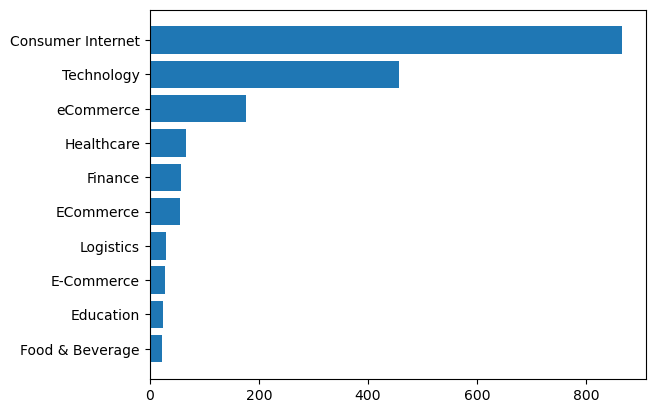

In [15]:
# Find out what type of startups are getting funded in the last few years?
all_IV_Count = df['IndustryVertical'].value_counts()
all_IV_Count = all_IV_Count[:10].sort_values(ascending=True)

x = all_IV_Count.index.tolist()[:10]
y = all_IV_Count.values.tolist()[:10]


# chart
plt.barh(x, y)

##### 2nd Ans.

Text(0, 0.5, 'Investor Name')

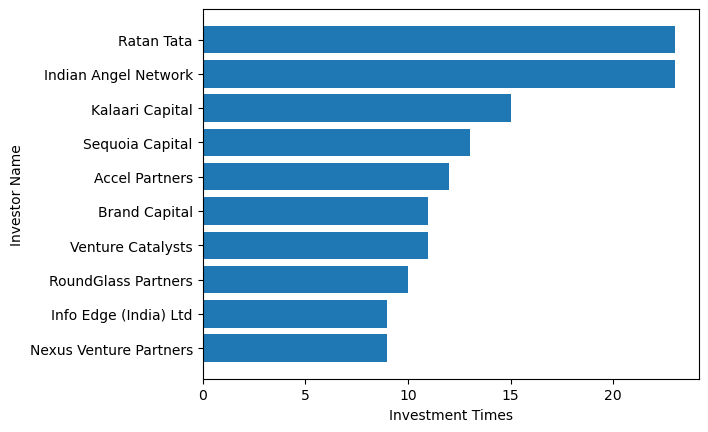

In [16]:
# Who are the important investors?
all_IN_Count = df['InvestorsName'].value_counts()
all_IN_Count = all_IN_Count[:10].sort_values(ascending=True)


x = all_IN_Count.index.tolist()[:10]
y = all_IN_Count.values.tolist()[:10]


# chart
plt.barh(x, y)
plt.xlabel('Investment Times')
plt.ylabel('Investor Name')

##### 3rd Ans.

['ECommerce', 'Technology', 'eCommerce', 'Transportation', 'Consumer Internet']
[1646503608.0, 1941288930.0, 2723218000.0, 3916632394.0, 5019362934.0]


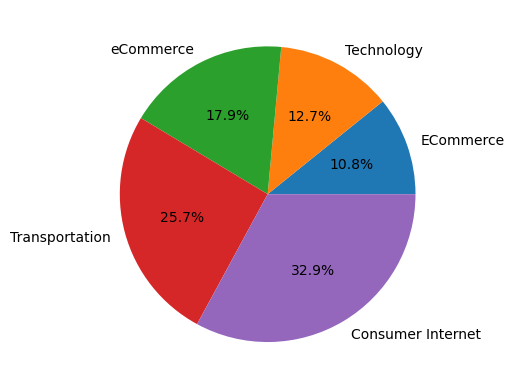

In [17]:
# What are the hot fields that get a lot of funding these days?
IV_unique = list(set(df['IndustryVertical']))
# print(IV_unique)

money = df['AmountInUSD']

remove_commas = lambda x: round(float(x.replace(',', '')), 2)
# Apply the function to the 'AmountInUSD' column
df['AmountInUSD'] = df['AmountInUSD'].apply(remove_commas)

# print(df['AmountInUSD'])
list_fund_Sizes = OrderedDict({})
# print(IVunique)
for i in IV_unique:
    present_IV_All_Row = df[df["IndustryVertical"] == i]
    list_fund_Sizes[list(present_IV_All_Row['IndustryVertical'])[0]] = present_IV_All_Row['AmountInUSD'].sum()
# print(list_fund_Sizes)

# sorting the dictionary based on value of keys
list_fund_Sizes = {k: v for k, v in sorted(list_fund_Sizes.items(), key=lambda item: item[1])} # copy from stack overflow just for sorting this dict.
# print(list_fund_Sizes)

Top_5_fund_Name = list(list_fund_Sizes.keys())[-5:]
print(Top_5_fund_Name)

Top_5_fund_Size = list(list_fund_Sizes.values())[-5:]
print(Top_5_fund_Size)


# chart
plt.pie(Top_5_fund_Size, labels = Top_5_fund_Name, autopct='%1.1f%%')

plt.show()

# Case Study: 2

<b> Problem statement </b>

<b> Check the trend of investments over the years. To check the trend, find - </b>

Total number of fundings done in each year.

Plot a line graph between year and number of fundings. Take year on x-axis and number of fundings on y-axis.

Print year-wise total number of fundings also. Print years in ascending order.

2015    731
2016    919
2017    652
2018    292
2019    108
2020      7
Name: count, dtype: int64
[2015, 2016, 2017, 2018, 2019, 2020] [731, 919, 652, 292, 108, 7]


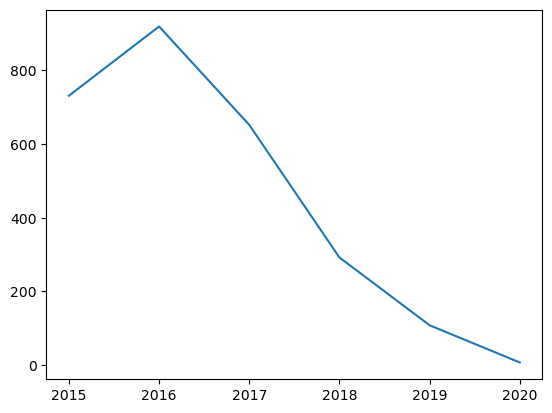

In [18]:
years = df["Date"].apply(lambda x : str(x).split()[0].split("-"))
lp = list(years)
years = pd.DataFrame([int(i[0]) for i in lp]) #if i use np the need one line more for converting into int
yaers_counts = years.value_counts().sort_index()
print(yaers_counts)

# graph
x = yaers_counts.index.tolist()
x = [i[0] for i in x]
y = yaers_counts.values.tolist()
print(x, y)

plt.plot(x,y)

# Case Study: 3

Problem statement

Find out which cities are generally chosen for starting a startup.

Find top 10 Indian cities which have most number of startups ?

Plot a pie chart and visualise it.

Print the city name and number of startups in that city also.

Note :
Take city name "Delhi" as "New Delhi".

Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".

For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is first.

Print the city in descending order with respect to the number of startups.


0       Bengaluru
1         Gurgaon
2       Bengaluru
3       New Delhi
4          Mumbai
          ...    
2868    Bangalore
2869    Bangalore
2870    Bangalore
2871      Chennai
2872        Noida
Name: Citys, Length: 2709, dtype: object
Bangalore 675
Mumbai 532
New Delhi 428
Gurgaon 278
Bengaluru 135
Pune 107
Chennai 94
Hyderabad 93
Noida 88
Gurugram 50


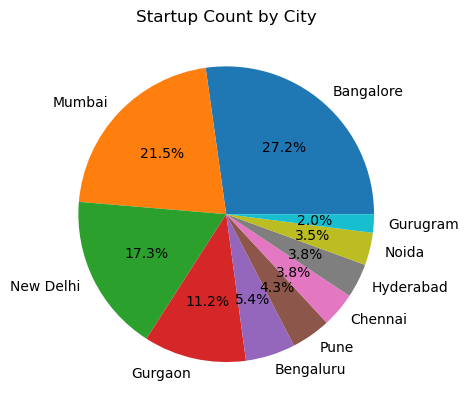

In [19]:
# Find out which cities are generally chosen for starting a startup.
# Find top 10 Indian cities which have most number of startups ?

df['Citys'] = df['CityLocation'].str.split('/', expand=True)[0].str.strip()
print(df['Citys'])
startup_count_by_city = df['Citys'].value_counts()

# Print top 10 cities with most startups
top_10_cities = startup_count_by_city[:10]
for city, count in top_10_cities.items():
    print(f'{city} {count}')

# Plot pie chart of startup count by city
plt.pie(startup_count_by_city.values[:10], labels=startup_count_by_city.index[:10], autopct='%1.1f%%')
plt.title('Startup Count by City')
plt.show()


# Case Study: 4

Problem statement
Given File 'startup_funding.csv'

Find out if cities play any role in receiving funding.

Find top 10 Indian cities with most amount of fundings received. Find out percentage of funding each city has got (among top 10 Indian cities only).

Print the city and percentage with 2 decimal place after rounding off.

Note:
Take city name "Delhi" as "New Delhi".

Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".

For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is first.

Print the city in descending order with respect to the percentage of funding.

Output Format :
city1 percent1
city2 percent2
city3 percent3

In [20]:
a = df["Citys"]
b = df["AmountInUSD"]
d = {}

for i in a.index:
    d[a[i]] = d.get(a[i],0) + b[i]

d1 = sorted(d, key=d.get , reverse=True) 

c = 1
d2 = {}
for i in d1:
    if c == 11:
        break
    d2[i] = d2.get(i,0) + d[i]
    c += 1
sum = 0
for i in d2.values():
    sum += i
for i in d2:
    print(i,format(d2[i]*100/sum,"0.2f"))

Bangalore 31.18
Bengaluru 24.45
Mumbai 12.86
New Delhi 10.30
Gurgaon 8.76
Noida 4.64
Pune 2.39
Chennai 2.31
Menlo Park 1.67
Gurugram 1.42


# Case Study: 5

<b>Problem statement
</br>
There are 4 different type of investments. Find out percentage of amount funded for each investment type.</b>

Plot a pie chart to visualise.

Print the investment type and percentage of amount funded with 2 decimal places after rounding off.

Note :
Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.

Print the investment type in descending order with respect to the percentage of the amount funded.

Output Format :
investmentType1 percent1
investmentType2 percent2
investmentType3 percent3

685510867.0 154583174.0 0 19457073165.0
Seed 3.38
debt 0.76
crowd 0.00
private 95.86


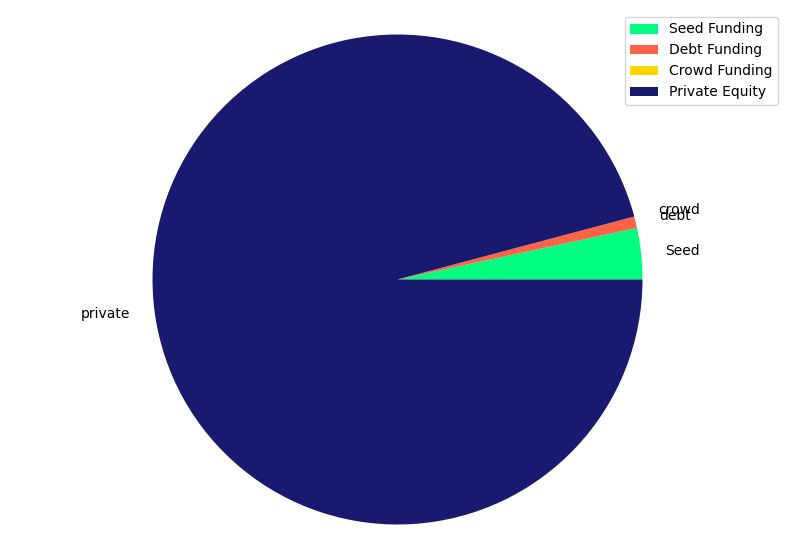

In [21]:
dfP = df[df["InvestmentType"] != ""].copy()
a = dfP["InvestmentType"]
b = dfP["AmountInUSD"]
d ={}

for i in a.index:
    d[a[i]] = d.get(a[i],0) + b[i]

seed = 0
debt = 0
crowd = 0
private = 0

for i in d:
    if "Seed" in i:
        seed+=d[i]
    elif "Debt" in i:
        debt+=d[i]
    elif "Crowd" in i:
        crowd+=d[i]
    elif "Private" in i:
        private+=d[i]
print(seed, debt, crowd, private)
d = {"Seed": seed, "debt": debt, "crowd": crowd, "private": private}

sum = 0
for i in d:
    sum += d[i]

for i in d:
    print(i,format(d[i]*100/sum,"0.2f"))

plt.figure(figsize=(10, 7))

plt.pie(d.values(),labels = d.keys(), colors=[
        # matplotlib named colors 
        '#00FF80', 'tomato', 'gold', '#191970'])
plt.axis("equal")
plt.legend(labels=["Seed Funding", "Debt Funding", "Crowd Funding", "Private Equity"],loc="best")
plt.show()


# Case Study: 6

<b>Problem statement
</br>
Which type of companies got more easily funding. To answer this question, find - </b>

Top 5 industries and percentage of the total amount funded to that industry. (among top 5 only)

Print the industry name and percentage of the amount funded with 2 decimal place after rounding off.

Note :
Ecommerce is the right word in IndustryVertical, so correct it.

Print the industry in descending order with respect to the percentage of the amount funded.

In [22]:
df["IndustryVertical"].replace("ecommerce","Ecommerce",inplace = True)
dfp = df[df["IndustryVertical"] != ""].copy()
a = dfp["IndustryVertical"]
b = df["AmountInUSD"]
d = OrderedDict({})

for i in a.index:
    d[a[i]] = d.get(a[i],0) + b[i]

d1 = sorted(d, key=d.get , reverse=True) 
d1 = d1[:5]
d2 = OrderedDict({})

for i in d1:
    d2[i] = d[i]
sum = 0
for i in d2:
    sum += d2[i]
for i in (d2):
    print(i,format(d2[i]*100/sum,"0.2f"))

Consumer Internet 32.92
Transportation 25.69
eCommerce 17.86
Technology 12.73
ECommerce 10.80


# Case Study: 7

<b>
Problem statement
</br>
Find top 5 startups with most amount of total funding.
</b>

Print the startup name in descending order with respect to amount of funding.

Note:
Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, ignore correcting all, just handle important ones.


In [23]:

df["StartupName"].fillna("",inplace = True)
df["StartupName"].replace("Flipkart.com","Flipkart",inplace = True)
df["StartupName"].replace("Ola Cabs","Ola",inplace = True)
df["StartupName"].replace("Olacabs","Ola",inplace = True)
df["StartupName"].replace("Oyorooms","Oyo",inplace = True)
df["StartupName"].replace("OyoRooms","Oyo",inplace = True)
df["StartupName"].replace("OYO Rooms","Oyo",inplace = True)
df["StartupName"].replace("Oyo Rooms","Oyo",inplace = True)
df["StartupName"].replace("Paytm Marketplace","Paytm",inplace = True)

dfp = df[df["StartupName"] != ""].copy()
a = dfp["StartupName"]
b = dfp["AmountInUSD"]
d = OrderedDict({})

for i in a.index:
    d[a[i]] = d.get(a[i],0) + b[i]

d1 = sorted(d, key=d.get , reverse=True) 
d1 = d1[:5]
for i in range(len(d1)):
    print(i+1, d1[i])

1 Rapido Bike Taxi
2 Paytm
3 Flipkart
4 Ola
5 Udaan


# Case Study: 8

Problem statement

Find the top 5 startups who received the most number of funding rounds. That means, startups which got fundings maximum number of times.

Print the startup name in descending order with respect to the number of funding round as integer value.

Note:
Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, ignore correcting all, just handle important ones.

In [24]:
d = df.StartupName.value_counts()
key=list(d.keys())
values=list(d)

key=np.array(key)
values=np.array(values)

ind=values.argsort()[::-1]
ind=ind[:5]

key=key[ind]
values=values[ind]

for i in range(len(key)):
    print(key[i],values[i])

Ola 13
Oyo 8
Swiggy 8
Meesho 6
Medinfi 6


# Case Study: 9

Problem statement
Find the Investors who have invested maximum number of times.

Print the investor name and number of times invested as integer value.

Note:
In startup, multiple investors might have invested. So consider each investor for that startup.

Ignore the undisclosed investors.

Output Format :
investorname number

In [25]:
d = OrderedDict({})
for i in df["InvestorsName"]:
    if "^" in i:
        j = i.strip().split('^')
        for a in j:
            d[a] = d.get(a,0) + 1
    else:
        d[i] = d.get(i,0) + 1
d1 = sorted(d, key=d.get , reverse=True)
print(d1[0],d[d1[0]])

Ratan Tata 23
